In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filenames = ['data.xls', 'data_more_observations.xls']

In [3]:
df = pd.concat((pd.read_excel(filename) for filename in filenames))
df.reset_index()

,index,id,param_1,param_2,param_3
0,0,191,0.025364,60,54
1,1,192,0.919820,37,34
2,2,193,0.936136,12,18
3,3,194,0.588972,91,23
4,4,195,0.742186,31,58
...,...,...,...,...,...
1995,995,2186,0.863426,38,36
1996,996,2187,0.311342,73,10
1997,997,2188,0.062279,57,72
1998,998,2189,0.652763,38,49


In [4]:
duplicates = df.duplicated(subset=['id'], keep='last')
df_no_duplicates = df[duplicates == False]
df_no_duplicates


,id,param_1,param_2,param_3
0,191,0.025364,60,54
1,192,0.919820,37,34
2,193,0.936136,12,18
3,194,0.588972,91,23
4,195,0.742186,31,58
...,...,...,...,...
995,2186,0.863426,38,36
996,2187,0.311342,73,10
997,2188,0.062279,57,72
998,2189,0.652763,38,49


In [5]:
another_df = pd.read_excel('data_more_features.xls')

In [6]:
merged_df = pd.merge(df_no_duplicates, another_df, on='id')
merged_df

,id,param_1,param_2,param_3,param_4,param_5
0,193,0.936136,12,18,11.233635,0.276612
1,194,0.588972,91,23,53.596458,0.805812
2,195,0.742186,31,58,23.007770,0.121802
3,196,0.505780,84,51,42.485540,0.396856
4,197,0.135994,5,66,0.679971,0.158063
...,...,...,...,...,...,...
1940,2186,0.863426,38,36,32.810206,0.988793
1941,2187,0.311342,73,10,22.727967,0.079445
1942,2188,0.062279,57,72,3.549895,0.648374
1943,2189,0.652763,38,49,24.804995,0.742442


In [7]:
wystapienia = merged_df.groupby('param_2')['id'].nunique()
wystapienia

param_2
1      14
2      32
3      16
4      19
5      24
       ..
96      9
97     22
98     23
99     15
100    23
Name: id, Length: 100, dtype: int64

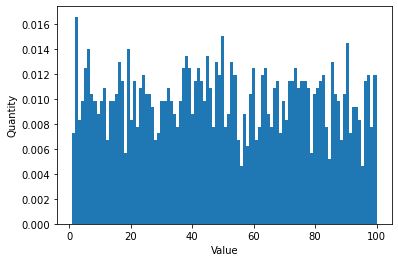

In [8]:
plt.hist(merged_df['param_2'], bins=100, density=True)
plt.ylabel('Quantity') 
plt.xlabel('Value')
plt.show()